<style type="text/css">
.reveal h1 {
    font-size: 2em;
}
</style>

<left><img width=25% src="img/cu_logo.svg"></left>

# Lecture 4: Statistical testing

__Milton Pividori__<br>Department of Biomedical Informatics<br>University of Colorado Anschutz Medical Campus

Based on slides from __Lauren Vanderlinden__

# Announcements

* **Course evaluations**
  * Due tomorrow, 12/2 at midnight. But course ends on 12/12.
  * I contacted Evelin Zumba (CPBS Program Administrator)

* **Journal Clubs (JC)**:
  * From your feedback, sounds like **groups** are a good option.
    * It was suggested to make groups before discussion.
  * Articles for **JC 02** and **JC 03** are already published on Canvas.

# Agenda

### Part 1: Statistical Inference
- Populations, samples, and sampling distributions
- Study designs and directed acyclic graphs (DAGs)

### Part 2: Hypothesis Testing Fundamentals
- Null and alternative hypotheses
- P-values, significance levels, and Type I/II errors
- Statistical power and effect sizes

### Part 3: Statistical Testing in Practice
- Conducting t-tests and chi-square tests in Python/R
- Interpreting results and understanding assumptions
- Introduction to Bayesian inference

### Hands-on Exercise
- Perform hypothesis tests on biomedical datasets using Python and R

<left><img width=25% src="img/cu_logo.svg"></left>
# Part 1

## Statistical Inference

## What is Statistical Inference?

**Statistical inference** is the process of using statistical methods to draw conclusions about **populations** based on observed patterns in data from **samples**.

* We want to learn about a large group (the population)
* But we can only collect data from a subset (the sample)
* **Key question:** How *confident* can we be that what we observe in our sample reflects the true population?
  * Quantification of *uncertainty*

**Example:** Does a new drug reduce blood pressure?

* **Population:** All patients with hypertension
* **Sample:** 80 patients in a clinical trial
* **Inference:** If the drug reduces BP in our sample (using a statistical approach), does it work for all hypertensive patients?
  * Our inference is justified using statistical methods.
  * Statistical inference allows us to *quantify the uncertainty* in our conclusions.

## Populations vs Samples

| Concept | Population | Sample |
|---------|------------|--------|
| **Definition** | Entire group of interest | Subset we actually measure |
| **Size** | Usually very large or infinite | Manageable (n = 30, 100, 1000...) |
| **Mean** | μ (parameter) | x̄ (statistic) |
| **Std Dev** | σ (parameter) | s (statistic) |
| **Availability** | Usually unknown | What we have |

* **Population:** The collection of units (people, plants, cities, etc.) to which we want to generalize a set of findings or a statistical model.
* **Sample:** A smaller (but hopefully representative) collection of units from a population used to determine the truths about that population.

**Key insight:** We use **statistics** (from samples) to estimate **parameters** (of populations).

## Sampling figure

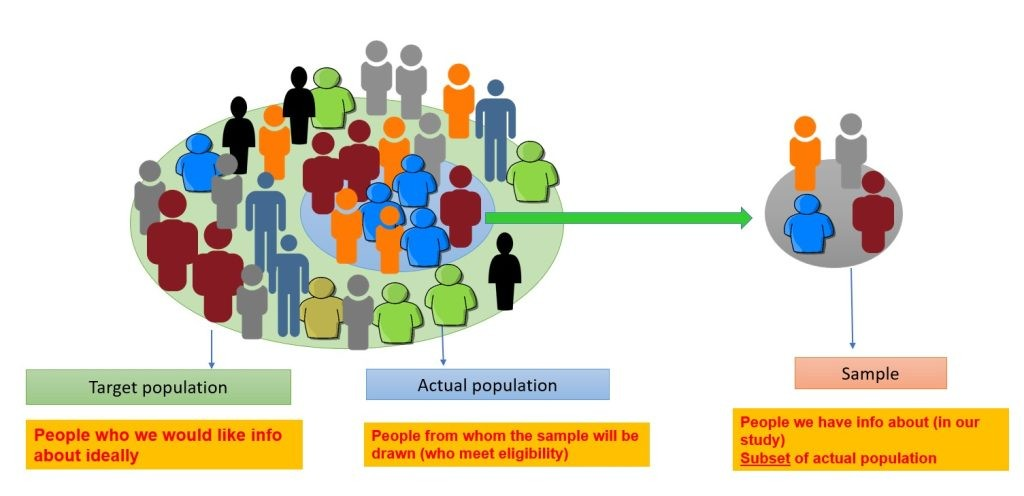

## When Sampling Goes Wrong

Good looks and smart people are normally distributed and not associated at all.

<center><img width=75% src="img/sampling_goes_wrong00.png"></center>

## When Sampling Goes Wrong

If movie producers want both good looks and smarts, and we sample from employed actors (blue), we'll have a spurious negative correlation.

<center><img width=75% src="img/sampling_goes_wrong01.png"></center>

## Selection bias

* **Bias** results when different types of units (people, etc) have different probabilities of getting into the study, or staying in the study.

* Participants have different probabilities of being included or retained in a study based on their **exposure** and/or **disease status**.

* The sample obtained is **not representative** of the population to which we would like to generalize the results.

* **Random sampling** typically ensures that all subpopulations are represented in the sample in roughly the same proportions as the entire population.

## Sampling Distributions

If we take many samples from the same population, each sample will give us a slightly different statistic.

The **sampling distribution** shows how much that statistic varies across samples.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.rcParams["figure.figsize"] = [12, 4]
np.random.seed(42)

In [2]:
# simulate: population of blood pressures
population_size = 100000
population_mean = 120
population_std = 15
population_bp = np.random.normal(population_mean, population_std, population_size)

# take 1000 samples of size 50, calculate mean of each
n_samples = 1000
sample_size = 50
sample_means = []

for i in range(n_samples):
    sample = np.random.choice(population_bp, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)

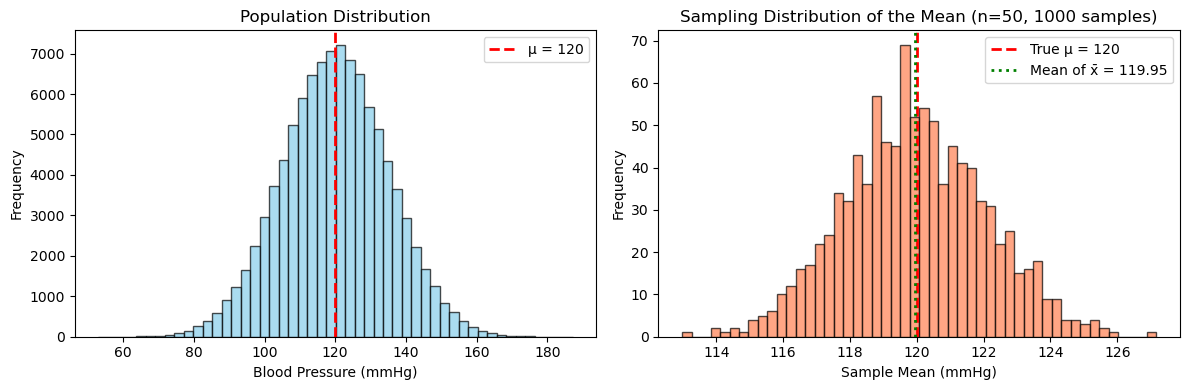

On the left:
 - Population mean (μ): 120
 - Population std (σ): 15
On the right:
 - Observed mean of sample means: 119.95
 - Observed std of sample means: 2.12
Standard error (σ/√n): 2.12


In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# population distribution
axes[0].hist(population_bp, bins=50, edgecolor="black", alpha=0.7, color="skyblue")
axes[0].axvline(
    population_mean,
    color="red",
    linewidth=2,
    linestyle="--",
    label=f"μ = {population_mean}",
)
axes[0].set_xlabel("Blood Pressure (mmHg)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Population Distribution")
axes[0].legend()

# sampling distribution
axes[1].hist(sample_means, bins=50, edgecolor="black", alpha=0.7, color="coral")
axes[1].axvline(
    population_mean,
    color="red",
    linewidth=2,
    linestyle="--",
    label=f"True μ = {population_mean}",
)
axes[1].axvline(
    sample_means.mean(),
    color="green",
    linewidth=2,
    linestyle=":",
    label=f"Mean of x̄ = {sample_means.mean():.2f}",
)
axes[1].set_xlabel("Sample Mean (mmHg)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Sampling Distribution of the Mean (n=50, 1000 samples)")
axes[1].legend()

plt.tight_layout()
plt.show()

print("On the left:")
print(f" - Population mean (μ): {population_mean}")
print(f" - Population std (σ): {population_std}")

print("On the right:")
print(f" - Observed mean of sample means: {sample_means.mean():.2f}")
print(f" - Observed std of sample means: {sample_means.std():.2f}")

print(f"Standard error (σ/√n): {population_std / np.sqrt(sample_size):.2f}")

## Standard Error

The **standard error** (SE) of a statistic (i.e., the estimator of a population parameter, like the mean) is the standard deviation of its sampling distribution.

SE measures the uncertainty in our estimate and is used in calculations of confidence intervals.

The SE of the sample mean is:

$$\text{SE}_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

* Larger sample size (n) → smaller SE → more precise estimate
* The sampling distribution becomes tighter around the true mean

**Key takeaway:** We can never know the true population parameter, but we can quantify our uncertainty about it

## Study Designs

How we collect our sample matters. Different study designs have different strengths and weaknesses.

<div style="display: flex; justify-content: space-between; align-items: center;">
  <img src="img/study_designs-causality_hierarchy.png" style="width:40%;">
  <img src="img/study_designs-flowchart.png" style="width:45%;">
</div>

<p style="font-size: 0.75em;">Grimes et al. An overview of clinical research: the lay of the land. <em>The Lancet</em>. 2002. (available on Canvas)</p>

## Levels Of Evidence

<center>
  <img src="img/study_designs-levels_of_evidence.svg" style="width:60%;">
</center>

<p style="font-size: 0.75em;">Tannenbaum M, Sebastian S. Levels of evidence. <em>OpenMD</em>. 2022. URL: https://openmd.com/guide/levels-of-evidence</p>

## Observational Studies

We **observe** without intervening. No manipulation of treatment/exposure.

**Types:**
* **Cohort study:** Follow a cohort/group over time
  * Type of longitudinal study
  * The cohort or group of people share a defining characteristic
* **Case-control:** Compare those with disease (cases) to those without (controls)
  * Cases and controls are compared on the basis of a supposed causal attribute
* **Cross-sectional:** Observing many individuals at a single point in time

**Strength:** Valuable for generating hypotheses. Cost-effective.

**Weakness:** Lack of control over variables (confounding). Hard to establish causation.

## Experimental Studies (Randomized Controlled Trials)

We **randomly assign** participants to treatment or control groups.
In other words, we manipulate one or more explanatory variables to see their effect on another variable.

**Example:** COVID-19 vaccine trials
* Randomly assign: vaccine vs placebo
* Measure: infection rates
* Compare: are rates different?

**Strength:** Randomization breaks confounding pathways. Strong causal inference.

**Weakness:** Expensive, time-consuming.

## Why Randomization Matters

**Without randomization:**
* Healthier people might choose to take the vaccine
* Sicker people might avoid it
* **Confounding:** Health status affects both treatment choice AND outcome

**With randomization:**
* Treatment assignment is independent of health status
* On average, groups are balanced on all variables (known and unknown)
* Differences in outcomes can be attributed to treatment

## Causal Inference and Observational Studies

Causal inference is challenging in observational studies because confounding variables may cause the differences in the behavior of the response variable for different groups.

A **confounding variable** is a variable that affects both the dependent variable (i.e., outcome, such as disease vs no disease) and the independent variable (i.e., treatment vs control).

## Confounding Example

```mermaid
flowchart LR
    A[<strong>PREDICTOR</strong><br>Smoking] --> B[<strong>OUTCOME</strong><br>Forced Expiratory<br>Volume/FEV]
```

## Confounding Example

<div style="display: flex; justify-content: space-between; align-items: center;">
  <img src="img/confounding_example-fev_smoke01.png" style="width:40%;">
  <img src="img/confounding_example-fev_smoke02.png" style="width:45%;">
</div>

**Conclusion:** Smokers have increased lung capacity?

<p style="font-size: 0.75em;">Allan Rossman. Statistics of illumination, part 4. URL: https://askgoodquestions.blog/2020/03/02/35-statistics-of-illumination-part-4/</p>

## Confounding Example

```mermaid
flowchart LR
    classDef box fill:#eef,stroke:#99f,stroke-width:1px,color:#000

    C[<strong>CONFOUNDER</strong><br>Age] --> A[<strong>PREDICTOR</strong><br>Smoking]
    C --> B[<strong>OUTCOME</strong><br>Forced Expiratory<br>Volume/FEV]
    A --> B
```

## Confounding Example

<div style="display: flex; justify-content: space-between; align-items: center;">
  <img src="img/confounding_example-fev_smoke03.png" style="width:40%;">
  <img src="img/confounding_example-fev_smoke04.png" style="width:45%;">
</div>

## Causal Inference and Randomized Studies

* Randomization breaks the link between confounders and treatment assignment.
* As a result, the treatment and control groups should differ only in the treatment received, aside from random chance.
* Random differences between groups are accounted for in statistical inference, which quantifies the uncertainty created by random assignment.

## Directed Acyclic Graphs (DAGs)

**DAGs** are intuitive yet rigorous tools to communicate about **causal questions** in clinical and epidemiologic research.

In this context, DAGs are directed graphs consisting of nodes and arrows that:
* Inform study design and statistical analysis.
* Constructed to depict **prior knowledge** about biological systems.
* Visualize hypothesized or assumed **causal relationships**.
* Help identify **sources of bias** (e.g., confounders) or other threats to validity (e.g., selection bias).

A DAG shows:
* **Variables** as nodes
* Known or suspected **causal relationships** as arrows (directed edges)
* **Acyclic:** No feedback loops

<p style="font-size: 0.75em;">Digitale et al. Tutorial on Directed Acyclic Graphs. <em>Journal of Clinical Epidemiology</em>. 2022. (available on Canvas)</p>

## DAGs example

<center>
  <img src="img/dag_example.png" style="width:40%;">
</center>

> Studies intended to estimate the causal effect of E on D must eliminate other, noncausal sources of association between E and D.

<p style="font-size: 0.75em;">Digitale et al. Tutorial on Directed Acyclic Graphs. <em>Journal of Clinical Epidemiology</em>. 2022. (available on Canvas)</p>

## DAG backbone

**Exposure–Outcome Examples:**
| **Exposure (E)**           | **Outcome (D)**           |
|----------------------------|----------------------------|
| Cause                      | Disease                    |
| Risk factor                | Case status                |
| Treatment                  | Effect                     |
| Intervention               | Health outcome             |
| Behavioral exposure        | Clinical endpoint          |

<p style="font-size: 0.75em;">Digitale et al. Tutorial on Directed Acyclic Graphs. <em>Journal of Clinical Epidemiology</em>. 2022. (available on Canvas)</p>

## DAGs: Key Patterns
*and how they relate to causal inference*



1. **Confounder** ✔️
2. **Precision covariate** ✔️

* Accounting for these variables promotes *exchangeability* between exposed and unexposed groups, and enhances *internal validity*.
* Accounting for confounders **controls for bias**; accounting for precision covariates **controls for measurement error**.

---

3. **Mediator** ❓ (maybe)
4. **Effect modifier** ❓ (maybe)

* Whether you deal with these types of variables in an analysis **depends on your research question**.

---

5. **Collider** ❌

* Colliders present a **selection bias** issue.
* Conditioning on a collider is a threat to both **internal** and **external validity**.

## DAGs: Confounder

> A confounder affects both the independent variable (the factor being manipulated or observed; the exposure) and the dependent variable (the outcome being measured; the outcome).

```mermaid
flowchart LR
    E["<strong>Exposure (E)</strong>"] -.-> D["<strong>Outcome (D)</strong>"]
    C["<strong>Confounder (C)</strong>"] --> E
    C --> D
```

* C causes both E and D
* Creates a spurious association
* **Must control for C**

## Confounder Example

Positive association between Exposure and Outcome, why?

```mermaid
flowchart LR
    ICE["Eating ice cream\n<strong>Exposure</strong>"] -.-> DROWN["Drowning\n<strong>Outcome</strong>"]
    SEASON["Season\n<strong>Confounder</strong>"] --> ICE
    SEASON --> DROWN
```

## Confounder Example

**Positive association** between eating ice cream and drowning:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(42)

# Centers for the four seasons (x = ice cream, y = drowning)
centers = {
    "Winter": (1.5, 2.0),
    "Fall": (2.5, 2.1),
    "Spring": (3.5, 2.2),
    "Summer": (4.5, 3.0),
}

markers = {
    "Winter": "s",
    "Spring": "o",
    "Fall": "X",
    "Summer": "^",
}

X_all = []
Y_all = []
S_all = []

for season, (cx, cy) in centers.items():
    # Create a blob of points around each center
    x = np.random.normal(cx, 0.3, size=25)
    y = np.random.normal(cy, 0.05, size=25)

    X_all.extend(x)
    Y_all.extend(y)
    S_all.extend([season] * len(y))

df = pd.DataFrame(
    {
        "x": np.array(X_all),
        "y": np.array(Y_all),
        "s": np.array(S_all),
    }
)

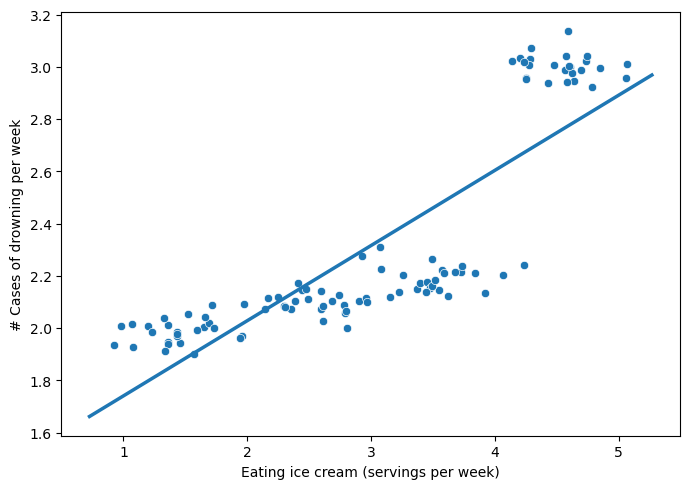

In [5]:
plt.figure(figsize=(7, 5))

sns.scatterplot(data=df, x="x", y="y")

# Fit and plot a simple regression line to show positive association
m, b = np.polyfit(X_all, Y_all, 1)
x_line = np.linspace(df["x"].min() - 0.2, df["x"].max() + 0.2, 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, linewidth=2.5)

plt.xlabel("Eating ice cream (servings per week)")
plt.ylabel("# Cases of drowning per week")
plt.tight_layout()
plt.show()

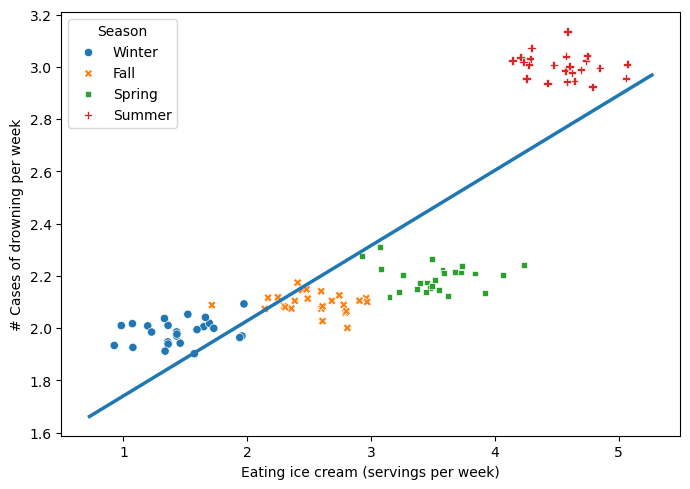

In [6]:
plt.figure(figsize=(7, 5))

sns.scatterplot(data=df, x="x", y="y", hue="s", style="s")

# Fit and plot a simple regression line to show positive association
m, b = np.polyfit(X_all, Y_all, 1)
x_line = np.linspace(df["x"].min() - 0.2, df["x"].max() + 0.2, 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, linewidth=2.5)

plt.xlabel("Eating ice cream (servings per week)")
plt.ylabel("# Cases of drowning per week")
plt.legend(title="Season", loc="upper left")
plt.tight_layout()
plt.show()

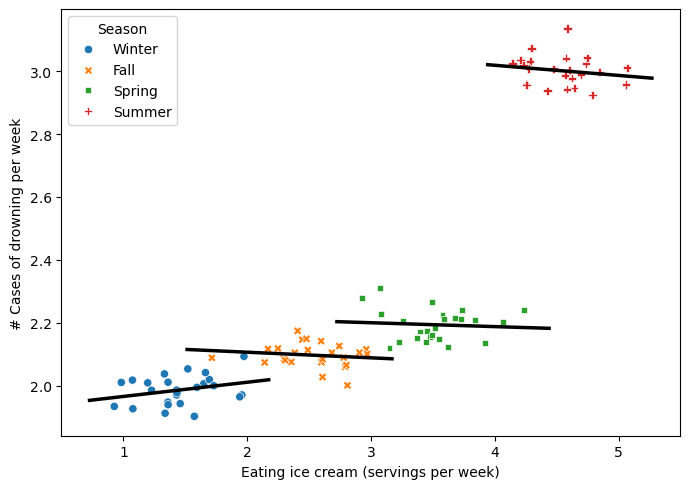

In [7]:
plt.figure(figsize=(7, 5))

sns.scatterplot(data=df, x="x", y="y", hue="s", style="s")

for idx, df_group in df.groupby("s"):
    # Fit and plot a simple regression per season
    m, b = np.polyfit(df_group["x"], df_group["y"], 1)
    x_line = np.linspace(df_group["x"].min() - 0.2, df_group["x"].max() + 0.2, 100)
    y_line = m * x_line + b
    plt.plot(x_line, y_line, color="black", linewidth=2.5)

plt.xlabel("Eating ice cream (servings per week)")
plt.ylabel("# Cases of drowning per week")
plt.legend(title="Season", loc="upper left")
plt.tight_layout()
plt.show()

**No association** between eating ice cream and drowning after conditioning on season

## DAGs: Precision Covariate

> Variable that accounts for variability (i.e., measurement error) in the exposure only, or the outcome only.

```mermaid
flowchart LR

    P1["<strong>Precision cov. 1</strong>"]
    E["<strong>Exposure (E)</strong>"]
    D["<strong>Outcome (D)</strong>"]
    P2["<strong>Precision cov. 2</strong>"]

    P1 --- E
    E --- D
    D --- P2

    P1 --> E
    E --> D
    P2 --> D

    linkStyle 0 stroke-width:0;
    linkStyle 1 stroke-width:0;
    linkStyle 2 stroke-width:0;
```

* A precision covariate is a variable that is not a confounder (it doesn't affect both exposure and outcome) but still helps to reduce random error in your estimates.
* Including these variables increases the precision (reduces variance) of your estimates.

## DAGs: Precision Covariate Example

**Question**: Is higher salivary cortisol associated with depression?

```mermaid
flowchart LR

    P1["Time of day of saliva collection\n<strong>Precision cov.</strong>"]
    E["Salivary cortisol\n<strong>Exposure</strong>"]
    D["Depression\n<strong>Outcome</strong>"]

    P1 --- E
    E --- D

    P1 --> E
    E --> D

    linkStyle 0 stroke-width:0;
    linkStyle 1 stroke-width:0;
```

<div style="display: flex; justify-content: space-between; align-items: center;">
  <img src="img/dag-diurnal_cortisol.png" style="width:40%;">
  <div style="width:55%;">
    <strong>What to do in an analysis?</strong>
    <ul>
      <li>Consider adjusting for it in the analysis.</li>
      <li>If adjustment does not make a difference in the estimate of interest, it may be better not to include it in the models.</li>
    </ul>
  </div>
</div>

## DAGs: Mediator

> A variable on the causal pathway between the exposure and outcome (i.e., caused by the exposure and a possible determinant of the outcome; also known as an intermediate variable).

```mermaid
flowchart LR
    E["<strong>Exposure (E)</strong>"] --> M["<strong>Mediator (M)</strong>"]
    M --> D["<strong>Outcome (D)</strong>"]
```

* Direct path: E → D
* Indirect path: E → M → D
* Adjusting for a mediator can remove part of the causal effect you want to estimate.
* Only adjust for mediators if you specifically want to study *indirect* effects.

## DAGs: Mediator Example

```mermaid
flowchart LR
    E["Fish oil supplements\n<strong>Exposure (E)</strong>"] --> M["Resolvin 5D\n<strong>Mediator (M)</strong>"]
    M --> D["Rheumatoid Arthritis\n<strong>Outcome (D)</strong>"]
```

<div style="display: flex; justify-content: space-between; align-items: center;">
  <div style="width:100%;">
    <strong>What to do in an analysis?</strong> It depends on the research question:
    <ol>
      <li><em>Does the effect of taking fish oil supplements on RA operate through the lipid mediator resolvin 5D anti-inflammatory pathway?</em></li>
        <ul>
            <li>Condition on mediator and compare total vs. direct effect of E on D.</li>
        </ul>
      <li><em>What is the effect of taking fish oil supplements on RA?</em></li>
        <ul>
            <li>Do not condition on mediator.</li>
        </ul>
    </ol>
  </div>
</div>

## DAGs: Effect Modifier

> A variable that changes the nature of the relationship between the exposure and outcome

```mermaid
graph LR
    E["<strong>Exposure (E)</strong>"] --- J(( ))
    J --> D["<strong>Outcome (D)</strong>"]
    EM["<strong>Effect<br/>modifier (EM)</strong>"] -.-> J
```

* It changes the *strength* or *direction* of the exposure’s effect on the outcome.
* It’s not a bias problem — it’s about understanding *heterogeneity*.

## DAGs: Effect Modifier Example

```mermaid
graph LR
    E["Mutation on gene <em>ADRA1A</em>\n<strong>Exposure (E)</strong>"] --- J(( ))
    J --> D["Decrease in expression\nin adipose tissue\n<strong>Outcome (D)</strong>"]
    EM["Sex\n<strong>Effect modifier (EM)</strong>"] -.-> J
```

<div style="display: flex; justify-content: space-between; align-items: center;">
  <div style="width:100%;">
    <strong>What to do in an analysis?</strong>
    <ol>
      <li>Use prior knowledge to determine what could be an effect modifier.</li>
      <li>Test for interaction effect between exposure and effect modifier.</li>
      <li>Stratify as necessary and interpret stratum-specific estimates.</li>
    </ol>
  </div>
</div>

## DAGs: Effect Modifier Example 1

<div style="display: flex; justify-content: space-between; align-items: center;">
  <div style="width:55%;">
    <img src="img/dag-eqtl00.png" style="width:100%;">
  </div>
  <div style="width:45%;">
    <strong>Genetic variant rs117380715 has a different effect on the expression of gene <em>ADRA1A</em> in adipose tissue:</strong>
    <ul>
      <li>Female effect size: -0.78, p-value: 4e-18</li>
      <li>Male effect size: -0.47, p-value: 4e-10</li>
    </ul>
  </div>
</div>


<p style="font-size: 0.75em;">Oliva et al. The impact of sex on gene expression across human tissues. <em>Science</em>. 2020.</p>

## DAGs: Effect Modifier Example 2

<div style="display: flex; justify-content: space-between; align-items: center;">
  <div style="width:55%;">
    <img src="img/dag-eqtl01.png" style="width:100%;">
  </div>
  <div style="width:45%;">
    <strong>Female-specific <em>cis</em>-eQTL rs3841377 has a different effect on the expression of gene <em>C4BPB</em> in breast:</strong>
    <ul>
      <li>Female effect size: 0.40, p-value: 3e-7</li>
      <li>Male effect size: -0.02, p-value: 0.89</li>
    </ul>
  </div>
</div>


<p style="font-size: 0.75em;">Oliva et al. The impact of sex on gene expression across human tissues. <em>Science</em>. 2020.</p>

## DAGs: Collider

> A variable that is caused by both the exposure and the outcome.

```mermaid
flowchart LR
    E["<strong>Exposure (E)</strong>"] --> D["<strong>Outcome (D)</strong>"]
    E --> C["<strong>Collider</strong>"]
    D --> C
```

* **What to do in an analysis?**
  * Identify colliders and leave them alone. Do not condition on a collider.

## Summary: Part 1

* **Statistical inference:** Using samples to learn about populations
* **Sampling distributions:** Quantify uncertainty in our estimates
* **Study designs:** Observational vs experimental (randomization matters!)
* **DAGs:** Visualize causality, identify confounders

**Next:** How do we actually test hypotheses about populations?

<left><img width=25% src="img/cu_logo.svg"></left>
# Part 2

## Hypothesis Testing Fundamentals

Hypothesis testing is a formal statistical procedure for deciding between two competing claims about a population parameter.

## The Logic of Hypothesis Testing

**Goal:** Decide whether an observed effect in our sample reflects a real effect in the population.
* Example: two-sample t-test to decide if the means of two independent groups are significantly different.

**Approach:**
1. Assume there's **no effect** (null hypothesis)
2. Calculate: How likely is our observed data if the null were true?
3. If very unlikely → reject the null hypothesis

## Null and Alternative Hypotheses

**Null Hypothesis ($H_0$):** Statement of "no effect" or "no difference"
* "The drug does not reduce blood pressure"
* "There is no association between smoking and lung cancer"
* "Mean anxiety scores are equal before and after treatment"

**Alternative Hypothesis ($H_1$):** Statement of "real effect" (what we want to show)
* "The drug reduces blood pressure"
* "Smoking is associated with lung cancer"
* "Mean anxiety scores differ before and after treatment"

**Key point:** We test by assuming H₀ is true, then look for evidence against it.

## Null and Alternative Hypotheses

<div style="display: flex; justify-content: space-between; align-items: center;">
  <div style="width:49%;">
    <img src="img/hypothesis_testing-null.png" style="width:100%;">
  </div>
  <div style="width:49%;">
    <img src="img/hypothesis_testing-alternative.png" style="width:100%;">
  </div>
</div>

## P-values: Definition

The **p-value** is the probability of observing data **this extreme or more extreme**, **IF the null hypothesis were true**.

$$p = P(\text{data as extreme as observed} \mid H_0 \text{ is true})$$

* In a biomedical context, we could say:

> The p-value is the probability that with a treatment that has no real effect, we would observe an effect (positive or negative) as extreme as (or more extreme than) the one observed.

* p-value measures "how significant" or "how confident" we are that there is no effect.
* Smaller p-value = stronger evidence against "no effect"

**Example:**
* Drug trial shows 5 mmHg mean BP reduction
* If drug had NO effect ($H_0$), what's the probability we'd see ≥5 mmHg reduction just by chance?
* If p = 0.02 → "only 2% chance of seeing this if drug doesn't work"

## Common P-value Misinterpretations

### ❌ Wrong interpretations:
* *"p = 0.04 means there's a 4% chance the null hypothesis is true"*
* *"p = 0.04 means there's a 96% chance the alternative is true"*
* *"p < 0.05 means the effect is large or important"*
* *"p > 0.05 means there's no effect"*

### ✅ Correct interpretation:
* *"p = 0.04 means: IF the null were true, we'd see data this extreme only 4% of the time"*
* It's a statement about **data**, not about hypotheses
* Small p-value = data are inconsistent with null hypothesis

## Visualizing P-values

Let's simulate a drug trial and visualize the p-value.

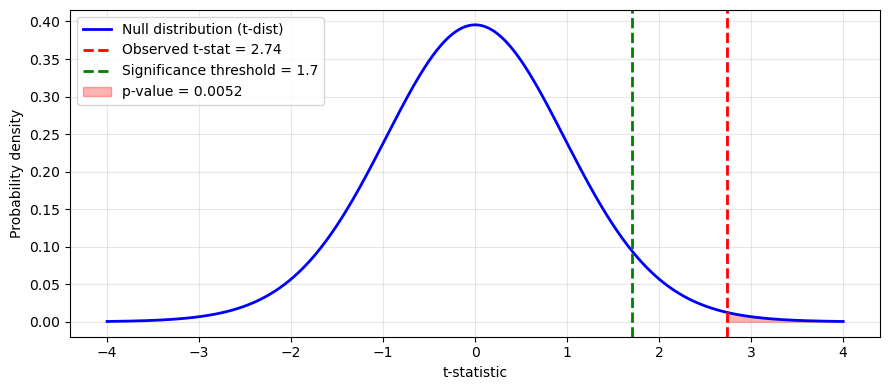

Observed mean reduction: 5 mmHg
t-statistic: 2.739
p-value: 0.0052

Interpretation: If drug had NO effect, we'd see a reduction
≥5 mmHg only 0.52% of the time by chance.


In [8]:
# simulate: does a new drug reduce blood pressure?
n = 30  # sample size
observed_reduction = 5  # mmHg mean reduction
sample_sd = 10  # standard deviation

# calculate t-statistic
t_stat = observed_reduction / (sample_sd / np.sqrt(n))
df = n - 1

# calculate p-value (one-tailed test)
p_value = 1 - stats.t.cdf(t_stat, df=df)

# visualize null distribution (t-distribution under null)
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=df)

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(x, y, "b-", linewidth=2, label="Null distribution (t-dist)")
ax.axvline(
    t_stat,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Observed t-stat = {t_stat:.2f}",
)
ax.axvline(
    1.7,
    color="green",
    linestyle="--",
    linewidth=2,
    label="Significance threshold = 1.7",
)

# shade the p-value region
x_tail = x[x >= t_stat]
y_tail = stats.t.pdf(x_tail, df=df)
ax.fill_between(
    x_tail, 0, y_tail, alpha=0.3, color="red", label=f"p-value = {p_value:.4f}"
)

ax.set_xlabel("t-statistic")
ax.set_ylabel("Probability density")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Observed mean reduction: {observed_reduction} mmHg")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")
print("\nInterpretation: If drug had NO effect, we'd see a reduction")
print(f"≥{observed_reduction} mmHg only {p_value*100:.2f}% of the time by chance.")

* Left and right tails represent very unlikely observations.
* Vertical, dashed lines:
  * red line is the observed statistic.
  * green line is the threshold corresponding to p-value < 0.05.
* The p-value is the area in the tail beyond the observed statistic.

## Significance Level ($\alpha$)

We need a threshold to decide when to reject $H_0$.

**Significance level $\alpha$:** The probability of Type I error we're willing to tolerate
* Typically $\alpha = 0.05$ (5%)
* If p < α: **Reject $H_0$** (result is "statistically significant")
* If p ≥ α: **Fail to reject $H_0$** (result is "not significant")

**Note:** α = 0.05 is somewhat arbitrary.
* Some fields use $\alpha = 0.01$ or $\alpha = 0.001$
* In genomics (GWAS): $\alpha = 5 \times 10^{-8}$ (we'll see why in Lecture 12)

## Rejecting vs Failing to Reject The Null

*We can never prove* the null hypothesis; you can only fail to reject it.

There are two possible outcomes in hypothesis testing:
1. **Reject the null**: p-value < $\alpha$
   * Interpretation: the observed data are unlikely under $H_0$ → evidence against the null → we reject it.
   * Common phrasing: "The result is statistically significant."

2. **Fail to reject the null**: p-value > $\alpha$
   * Interpretation: the data are not strong enough to reject $H_0$.
     * BUT this does NOT mean $H_0$ is true
     * It simply means that we didn't find enough evidence to conclude otherwise.

## Type I and Type II Errors

Two ways our test can be wrong:

|                     | **$H_0$ is TRUE**          | **$H_0$ is FALSE**         |
|---------------------|-------------------------|-------------------------|
| **Reject $H_0$** | **Type I Error ($\alpha$)**    | ✅ Correct (Power)      |
| **Fail to reject** | ✅ Correct (1-$\alpha$)        | **Type II Error ($\beta$)**   |

* **Type I error (False Positive):** Reject $H_0$ when it's actually true
  * Probability = $\alpha$ (significance level)
  * Example: Approve ineffective drug

* **Type II error (False Negative):** Fail to reject $H_0$ when it's actually false
  * Probability = $\beta$
  * Example: Reject effective drug

**Trade-off:**
* Stricter $\alpha$ (e.g., 0.01) → fewer false positives BUT more false negatives
* This trade-off becomes critical in **multiple testing** (Lecture 12)

## Very Low p-values

* Very low p-values are often suspect.
* Never report a p-value = 0
  * There is always some probability that you could get the result by chance.
* Instead, report "p-value < 0.001"

In [9]:
1e-2

0.01

In [10]:
1e-50

1e-50

In [11]:
1e-300

1e-300

In [12]:
1e-350

0.0

In [13]:
1e-350 == 0.0

True

## Statistical Power (1 - $\beta$)

**Power** is the probability of detecting an effect **when it truly exists**.

$$\text{Power} = 1 - \beta = P(\text{reject } H_0 \mid H_0 \text{ is false})$$

* High power (e.g., 0.8 or 80%) → likely to detect real effects
* Low power → likely to miss real effects (false negatives)

## Factors Affecting Power

Power increases with:

1. **Larger sample size ($n$)**
   * More data → more precise estimates

2. **Larger effect size**
   * Bigger effects are easier to detect

3. **Higher $\alpha$**
   * Less stringent threshold → easier to reject $H_0$
   * But more Type I errors.

4. **Lower variability ($\sigma$)**
   * Less noise → clearer signal

## Factors Affecting Power: Childhood- vs Adult-Onset Asthma

<center>
  <div style="width:60%;">
    <img src="img/hypothesis_testing-asthma_characteristics.png" style="width:100%;">
  </div>
</center>

<p style="font-size: 0.75em;">Pividori et al. Shared and distinct genetic risk factors for childhood-onset and adult-onset asthma: genome-wide and transcriptome-wide studies. <em>The Lancet Respiratory Medicine</em>. 2019.</p>

## Factors Affecting Power: Childhood- vs Adult-Onset Asthma

<center>
  <div style="width:100%;">
    <img src="img/hypothesis_testing-asthma_miami_plot.png" style="width:100%;">
  </div>
</center>

<p style="font-size: 0.75em;">Pividori et al. Shared and distinct genetic risk factors for childhood-onset and adult-onset asthma: genome-wide and transcriptome-wide studies. <em>The Lancet Respiratory Medicine</em>. 2019.</p>

## Effect Sizes

**Effect size** measures the **magnitude** of a difference or association.

**Standardized effect size** is a unitless measure that often incorporates error
* Examples: Cohen's d, correlation coefficient, etc

**Why it matters:**
* Statistical significance (p < 0.05) $\neq$ Practical importance
* With huge sample, tiny effects can be "significant"
* Effect sizes tell us **how big** the effect is

## Common Effect Size Measures

**For mean differences:**
* **Cohen's d:** Standardized mean difference
  $$d = \frac{\bar{x}_1 - \bar{x}_2}{s_{\text{pooled}}}$$
  * Small: 0.2, Medium: 0.5, Large: 0.8

**For associations:**
* **Correlation coefficient r:** Ranges from -1 to 1
* **Odds ratio:** Ratio of odds in two groups

**For variance explained:**
* **R² (coefficient of determination):** Proportion of variance explained

## Example: Statistical vs Practical Significance

**Scenario 1:** Small study (n=30)
* Mean BP reduction = 10 mmHg, p = 0.06
* **Not statistically significant**, but might be **clinically meaningful**

**Scenario 2:** Huge study (n=10,000)
* Mean BP reduction = 1 mmHg, p < 0.001
* **Statistically significant**, but **clinically trivial**

**Lesson:** Always report and interpret effect sizes alongside p-values.

* Statistical significance shows that an effect exists in a study
* Practical significance shows that the effect is large enough to be meaningful

* Statistical significance alone can be misleading as it's influenced by sample size.
* In contrast, effect sizes are independent of sample size.

## Summary: Part 2

* **Hypothesis testing:** Assume $H_0$, calculate p-value, decide
* **P-values:** Probability of data given $H_0$
* **Type I error ($\alpha$):** False positive rate
* **Type II error ($\beta$):** False negative rate
* **Power (1-$\beta$):** Probability of detecting real effects
* **Effect sizes:** How big is the effect?

<left><img width=25% src="img/cu_logo.svg"></left>
# Part 3

## Statistical Testing in Practice

## Common Statistical Tests

Now we apply hypothesis testing using Python.

**Three tests we'll cover:**
1. **Independent samples t-test:** Compare means of two groups
2. **Paired t-test:** Compare before/after in same subjects
3. **Chi-square test:** Test association between categorical variables

In [4]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, ttest_rel

## Independent Samples T-test

**Question:** Does a new antidepressant reduce depression scores?

**Data:** Depression scores (higher = more depressed)
* Treatment group ($n=40$): received new drug
* Control group ($n=40$): received placebo

**Null hypothesis:** $\mu_{\mathrm{treatment}} = \mu_{\mathrm{control}}$

**Alternative:** $\mu_{\mathrm{treatment}} < \mu_{\mathrm{control}}$ (treatment reduces depression)

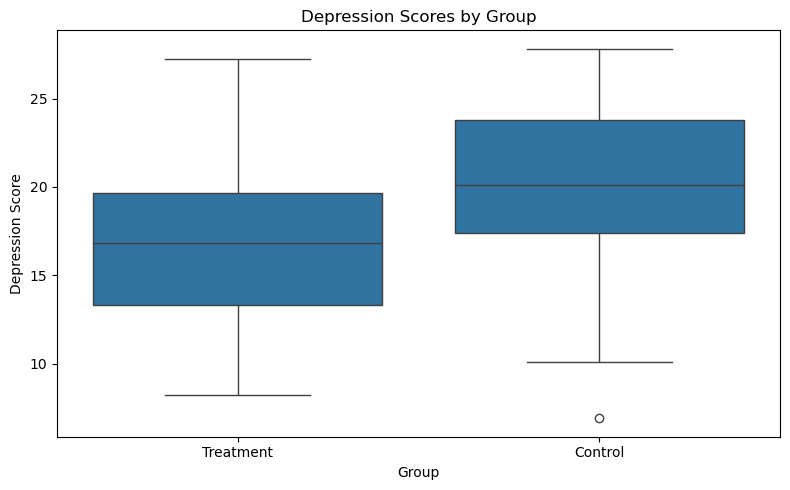

Treatment: Mean = 16.91, SD = 4.70
Control:   Mean = 19.85, SD = 4.76
Difference: 2.95


In [15]:
# simulate data
np.random.seed(42)
# mean depression = 18
treatment = np.random.normal(18, 5, 40)
# mean depression = 20
control = np.random.normal(20, 5, 40)

# visualize
fig, ax = plt.subplots(figsize=(8, 5))
data_for_plot = pd.DataFrame(
    {
        "Depression Score": np.concatenate([treatment, control]),
        "Group": ["Treatment"] * 40 + ["Control"] * 40,
    }
)
sns.boxplot(data=data_for_plot, x="Group", y="Depression Score", ax=ax)
ax.set_title("Depression Scores by Group")
plt.tight_layout()
plt.show()

print(f"Treatment: Mean = {treatment.mean():.2f}, SD = {treatment.std():.2f}")
print(f"Control:   Mean = {control.mean():.2f}, SD = {control.std():.2f}")
print(f"Difference: {control.mean() - treatment.mean():.2f}")

## Performing the T-test

In [16]:
# perform independent samples t-test
t_stat, p_value = ttest_ind(treatment, control)

# effect size: calculate Cohen's d
pooled_std = np.sqrt((treatment.std() ** 2 + control.std() ** 2) / 2)
cohens_d = (treatment.mean() - control.mean()) / pooled_std

print("INDEPENDENT SAMPLES T-TEST")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")
print(f"Cohen's d: {cohens_d:.3f}")
print("\n")
print("Effect size interpretation: ", end="")
if abs(cohens_d) < 0.2:
    print("Small effect")
elif abs(cohens_d) < 0.5:
    print("Small to medium effect")
elif abs(cohens_d) < 0.8:
    print("Medium to large effect")
else:
    print("Large effect")

INDEPENDENT SAMPLES T-TEST
t-statistic: -2.750
p-value: 0.0074
Cohen's d: -0.623


Effect size interpretation: Medium to large effect


## Assumptions of the T-test

Before trusting the t-test, check:

1. **Independence:** Observations are independent
2. **Normality:** Data approximately normal (robust to violations with large $n$)
3. **Variances:**
   * Assume equal population variances: `ttest_ind`'s `equal_var=True` (default)
   * Does not assume equal population variances: `ttest_ind`'s `equal_var=False` (Welch's t-test)

## Paired T-test

**Question:** Does anxiety treatment reduce anxiety scores?

**Data:** Same 20 patients measured **before** and **after** treatment

**Why paired?** Same subjects → controls for individual differences

In [17]:
# a simulated anxiety dataset
# here I take a sample of 20 subjects to play with how sample size affects p-values
anxiety_data = pd.read_csv("_datasets/anxiety_treatment.csv").sample(
    n=20, random_state=6
)

print(anxiety_data.head())
print(f"\nSample size: {len(anxiety_data)}")
print(f"Mean pre-treatment:\t{anxiety_data['pre_treatment'].mean():.2f}")
print(f"Mean post-treatment:\t{anxiety_data['post_treatment'].mean():.2f}")
print(
    f"Mean difference:\t{(anxiety_data['pre_treatment'] - anxiety_data['post_treatment']).mean():.2f}"
)

    subject_id  pre_treatment  post_treatment  age sex
0            1      54.967142       49.975675   58   F
28          29      43.993613       34.337296   53   M
27          28      53.756980       47.303042   39   F
6            7      65.792128       56.747810   51   F
17          18      53.142473       39.856862   33   F

Sample size: 20
Mean pre-treatment:	47.55
Mean post-treatment:	41.08
Mean difference:	6.47


## Visualizing Paired Data

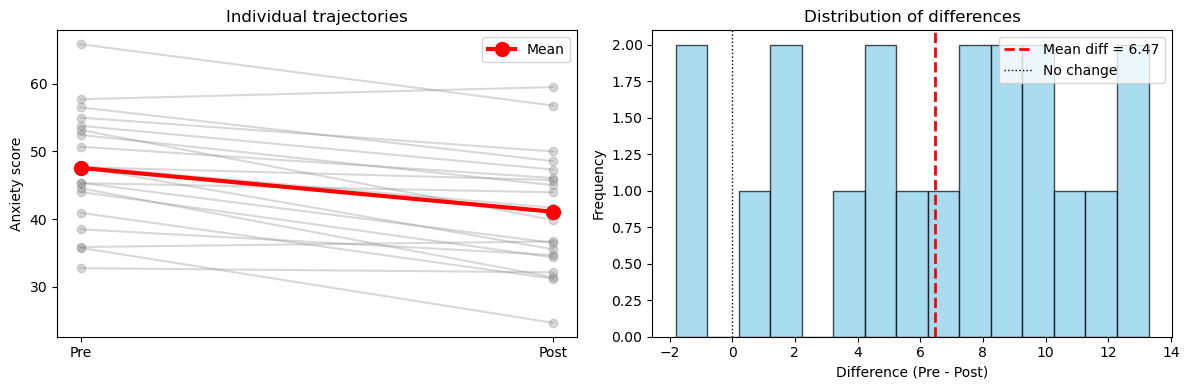

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# before/after comparison
axes[0].plot(
    [0, 1],
    [anxiety_data["pre_treatment"], anxiety_data["post_treatment"]],
    "o-",
    alpha=0.3,
    color="gray",
)
axes[0].plot(
    [0, 1],
    [anxiety_data["pre_treatment"].mean(), anxiety_data["post_treatment"].mean()],
    "ro-",
    linewidth=3,
    markersize=10,
    label="Mean",
)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Pre", "Post"])
axes[0].set_ylabel("Anxiety score")
axes[0].set_title("Individual trajectories")
axes[0].legend()

# difference distribution
differences = anxiety_data["pre_treatment"] - anxiety_data["post_treatment"]
axes[1].hist(differences, bins=15, edgecolor="black", alpha=0.7, color="skyblue")
axes[1].axvline(
    differences.mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean diff = {differences.mean():.2f}",
)
axes[1].axvline(0, color="black", linestyle=":", linewidth=1, label="No change")
axes[1].set_xlabel("Difference (Pre - Post)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of differences")
axes[1].legend()

plt.tight_layout()
plt.show()

## Performing Paired T-test

In [19]:
# perform paired t-test
t_stat, p_value = ttest_rel(
    anxiety_data["pre_treatment"], anxiety_data["post_treatment"]
)

# calculate effect size: Cohen's d for paired data
mean_diff = differences.mean()
sd_diff = differences.std()
cohens_d = mean_diff / sd_diff

print("PAIRED T-TEST:")
print(f"Mean difference (Pre - Post): {mean_diff:.2f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.6f}")
print(f"Cohen's d: {cohens_d:.3f}")

PAIRED T-TEST:
Mean difference (Pre - Post): 6.47
t-statistic: 6.341
p-value: 0.000004
Cohen's d: 1.418


## Chi-square Test

**Question:** Is SNP1 genotype associated with disease status?

**Data:** Genotype (0, 1, 2 copies of risk allele) vs Disease (case/control)

**Null hypothesis:** Genotype and disease are independent

Contingency table: SNP1 vs Disease
SNP1            0.0  1.0  2.0
disease_status               
case             28   35   37
control          49   33   18



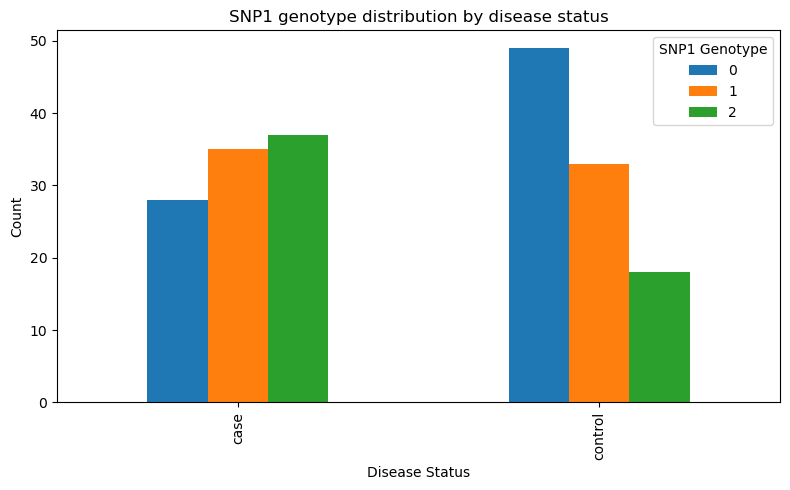

In [20]:
# load SNP data
snp_data = pd.read_csv("_datasets/snp_disease.csv")

# create contingency table for SNP1
contingency_table = pd.crosstab(snp_data["disease_status"], snp_data["SNP1"])
print("Contingency table: SNP1 vs Disease")
print(contingency_table)
print()

# visualize

contingency_table.plot(kind="bar", figsize=(8, 5))
plt.xlabel("Disease Status")
plt.ylabel("Count")
plt.title("SNP1 genotype distribution by disease status")
plt.legend(title="SNP1 Genotype", labels=["0", "1", "2"])
plt.tight_layout()
plt.show()

## Performing Chi-square Test

In [21]:
# perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("CHI-SQUARE TEST:")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p_value:.6f}")
print()
print("Expected counts under null hypothesis:")
print(
    pd.DataFrame(
        expected, index=contingency_table.index, columns=contingency_table.columns
    )
)
print()

CHI-SQUARE TEST:
Chi-square statistic: 12.350
Degrees of freedom: 2
p-value: 0.002081

Expected counts under null hypothesis:
SNP1             0.0   1.0   2.0
disease_status                  
case            38.5  34.0  27.5
control         38.5  34.0  27.5



## (Super) Brief Introduction to Bayesian Inference

So far: **Frequentist approach** (p-values, hypothesis testing)

Alternative: **Bayesian approach**
* Includes prior beliefs
* Probability of being right (posterior probability) vs probability of being wrong (p-value)
* Treats parameters as random variables
* Updates beliefs with data

## Bayes' Theorem

$$P(\theta \mid \text{data}) = \frac{P(\text{data} \mid \theta) \times P(\theta)}{P(\text{data})}$$

Or more intuitively:

$$\text{Posterior} = \frac{\text{Likelihood} \times \text{Prior}}{\text{Evidence}}$$

* **Prior $P(\theta)$:** What we believe before seeing data
* **Likelihood $P(\mathrm{data}|\theta)$:** How likely is our data given $\theta$?
* **Posterior $P(\theta|\mathrm{data})$:** Updated belief after seeing data

## Bayesian Example: Treatment Success Rate

**Scenario:** New treatment tried on 10 patients, 7 succeeded.

**Question:** What's the success rate ($\theta$)?

**Bayesian approach:**
1. Choose *prior*: Beta(1,1) - uniform (no prior knowledge)
2. Observe data: 7 successes out of 10 (Binomial distribution)
3. Calculate *posterior*: Beta(8, 4)
   * Using the [Beta-Binomial update rule](https://en.wikipedia.org/wiki/Conjugate_prior): Beta(8, 4) = Beta(1+7, 1+3)

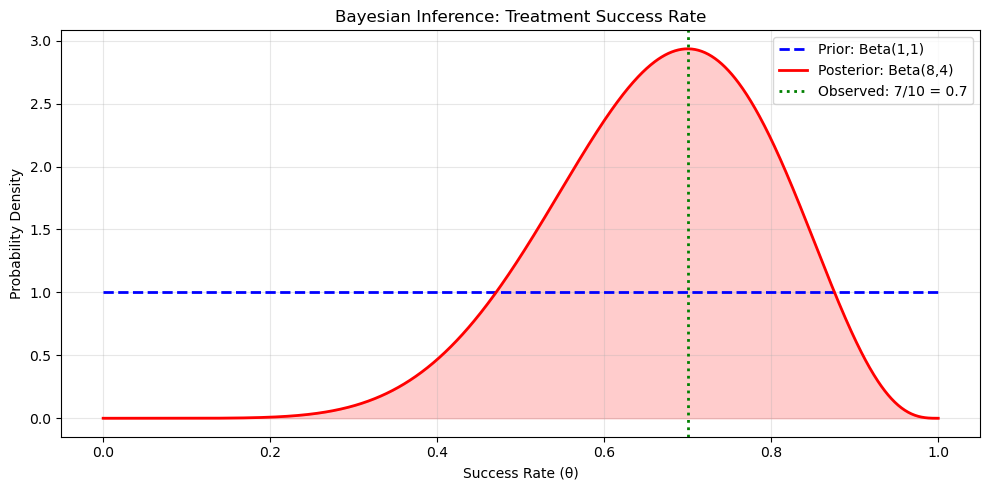

95% Credible Interval: [0.390, 0.891]

Interpretation: We are 95% confident the true success rate is between 39.0% and 89.1%


In [22]:
from scipy.stats import beta as beta_dist

# define range
theta = np.linspace(0, 1, 1000)

# prior: Beta(1,1) = Uniform
prior = beta_dist.pdf(theta, 1, 1)

# posterior: Beta(8, 4)
posterior = beta_dist.pdf(theta, 8, 4)

# plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(theta, prior, "b--", linewidth=2, label="Prior: Beta(1,1)")
ax.plot(theta, posterior, "r-", linewidth=2, label="Posterior: Beta(8,4)")
ax.axvline(0.7, color="green", linestyle=":", linewidth=2, label="Observed: 7/10 = 0.7")
ax.fill_between(theta, 0, posterior, alpha=0.2, color="red")
ax.set_xlabel("Success Rate (θ)")
ax.set_ylabel("Probability Density")
ax.set_title("Bayesian Inference: Treatment Success Rate")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 95% credible interval
credible_interval = beta_dist.interval(0.95, 8, 4)
print(
    f"95% Credible Interval: [{credible_interval[0]:.3f}, {credible_interval[1]:.3f}]"
)
print(
    f"\nInterpretation: We are 95% confident the true success rate is between {credible_interval[0]:.1%} and {credible_interval[1]:.1%}"
)

* **Bayesian CI:** "There's a 95% probability the parameter is in this interval"
   * More intuitive.

* **Frequentist CI:** "If we repeated this study many times, 95% of confidence intervals would contain the true parameter"
   * Confidence is placed in the interval itself instead of the parameter.

## Summary: Part 3

* **T-tests:** Compare means (independent or paired)
* **Chi-square:** Test associations between categorical variables
* **Check assumptions of tests**
* **Effect sizes** matter as much as p-values
* **Bayesian inference:** Alternative framework with direct probability statements

# **Hands-on Exercises**

No hands-on exercise for this lecture. You can try the examples on this notebook.

# Anonymous Feedback On This Lecture

<center>
    <img width=60% src="img/feedback_form_qr.png">
</center>

* **Link:** https://forms.office.com/r/prXY35CNuz
* **Lecture number:** 4
* **Lecture topic:** statistical testing